### University of Stirling
#### Computing Science and Mathematics
#### CSCU9YE - Artificial Intelligence
#### Student Number: 2838655

# Coursework: The Multi-dimensional Knapsack Problem

## Aquiring the problem data

-  This function reads the data of a given problem instance
-  It returns four variables in the the following order, using the variable names as in the mathematical formulation described in the coursework
    - *n*: number of items, 
    - *m*: number of constraints
    - *p*: one dimensional numpy array with the profit coefficients for each item 
    - *r*: two dimensional numpy array with the resource coefficients for each item on each constraint/resource
    - *b*: one dimensional numpy array with the constraints right-hand size, that is the bounds or capacities 


In [1]:
import numpy as np

def read_multi_knapsack(fname):
    """
    Reads the data of a multi-knapsack instance

    :param fname: file name with instance data
    :return: n, m, p, r and b (as described above)
    """ 
    profits = []
    with open(fname, 'r') as kfile:
        lines = kfile.readlines()
        
    # convert m,n  to integer variables   
    n, m  = [int(d) for d in lines[0].split()]   # convert string data to integers
        
    input_line_cnt = 1    # input lines index after first line
    p = np.empty(0, dtype=np.int64)
    while p.size < n:
        d = np.loadtxt(lines[input_line_cnt].split(),
                       delimiter=" ", dtype=np.int64)
        p = np.append(p, d)
        input_line_cnt += 1

    r = np.empty((0, n), dtype=np.int64)
    for i in range(m):
        lin = np.empty(0, dtype=np.int64)
        while lin.size < n:
            d = np.loadtxt(lines[input_line_cnt].split(),
                           delimiter=" ", dtype=np.int64)
            lin = np.append(lin, d)
            input_line_cnt += 1
        r = np.vstack((r, lin))

    # get the capacities (max of one line space separated integer values)
    b = np.loadtxt(lines[input_line_cnt].split(),
                     delimiter=" ", dtype=np.int64)

    return  n, m, p, r, b


In [2]:
## Reading data from a file

data_file_name = "multi_knap_n40_m5.txt"        

n, m, profits, res, cap = read_multi_knapsack(data_file_name)

print("Instance Data:")
print(f"n: {n}.  m: {m}")
print(f"Profits: {profits}")
print(f"Resources: {res}")
print(f"Capacities: {cap}")

Instance Data:
n: 40.  m: 5
Profits: [360  83  59 130 431  67 230  52  93 125 670 892 600  38  48 147  78 256
  63  17 120 164 432  35  92 110  22  42  50 323 514  28  87  73  78  15
  26  78 210  36]
Resources: [[ 7  0 30 22 80 94 11 81 70 64 59 18  0 36  3  8 15 42  9  0 42 47 52 32
  26 48 55  6 29 84  2  4 18 56  7 29 93 44 71  3]
 [ 8 66 98 50  0 30  0 88 15 37 26 72 61 57 17 27 83  3  9 66 97 42  2 44
  71 11 25 74 90 20  0 38 33 14  9 23 12 58  6 14]
 [ 3 74 88 50 55 19  0  6 30 62 17 81 25 46 67 28 36  8  1 52 19 37 27 62
  39 84 16 14 21  5 60 82 72 89 16  5 29  7 80 97]
 [21 40  0  6 82 91 43 30 62 91 10 41 12  4 80 77 98 50 78 35  7  1 96 67
  85  4 23 38  2 57  4 53  0 33  2 25 14 97 87 42]
 [94 86 80 92 31 17 65 51 46 66 44  3 26  0 39 20 11  6 55 70 11 75 82 35
  47 99  5 14 23 38 94 66 64 27 77 50 28 25 61 10]]
Capacities: [ 480  760  800 1180  940]


# Part 1: Simple Hill-Climbing 
This greedy heuristic method examines the neighboring nodes one by one and selects the first neighboring node which optimizes the current cost as the next node.


In [3]:
#Implement a suitable fitness function for this problem.

import random as rnd

def random_sol(l, prop):
    "Generates a random binary vector of lenght l, and proportions of 0 and 1s as indicated in the prop vector"
    sol = rnd.choices([0,1], weights = prop, k = l)  # Random solution elements giving different bias to zeros and ones
    return sol

### Implement a function that  checks the validity  of a solution
The soltionChecker function receives a solution as parameter and by iterating through it, generating a weight value consisting of the total resutling from the product between the solution and the resource array, which will then be tested against its respective value found in the capacity array with the same index.
If the solution weight is greater then the constraint's capacity then the value returned is False, otherwise the function will return True, indicating the solution's validity. 

In [4]:
def solutionChecker(sol):
    for i in range(len(cap)):
        sol_weight = sum(sol[j] * res[i][j] for j in range(n)) # Sum solution to resource array to get weight of sol
        if(sol_weight > cap[i]): # Compare it to capacity array
            return False
    return True

### Implement a fitness  (evaluation) function.
The function receives a solution as a parameter, which will be evaluated by multiplying the soultion array to the resources array, generating a weight value, which will be considered valid only if it does not excess the ones reported on the capacity array.
If the solution is then considered, it will be assigned a fitness value, which consists of 0 if the weight value excesses the capacity value at their corrisponding indexes or otherwise will be composed by the product between the values found at index in the solution array and respectively in the profit array. 


In [5]:
def evaluate(sol):
    weightArray = [] # Initiate array which will store weights 
    for j in range(len(cap)): # Iterate through each constraint 
        weight = sum([sol[i] * res[j][i] for i in range(n)]) 
        if weight > cap[j]: # If result weight is greater than his correspective capacity constraint
            fitness = 0 # Solution is not fit
            break 
        else:
            fitness = sum([sol[i] * profits[i] for i in range(n)])   
            weightArray.append(weight) # Append weights to weightArray initiated previously
    return fitness, weightArray 

In [14]:
# SolutinChecker function testing

sol = random_sol(n, [75,25])
print(sol)
solutionChecker(sol)
print(cap)
print(evaluate(sol)[1])
print("Solution is :", solutionChecker(sol))

[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[ 480  760  800 1180  940]
[443, 487, 291, 309, 352]
Solution is : True


In [15]:
# Neighbour function which will receive a solution and return a neighbouring solution generated 
# by replace a random index with its contrary (if 0 -> 1, if 1 ->0)

def neighbour(sol):
    neig = sol[:] # Copy solution
    i = rnd.randint(0,n-1) # Generate random number between 0 and (n - 1)
    neig[i] = 0 if sol[i] == 1 else 1 # Alter digit in index i with its inverse  
    return neig

In [16]:
# Neighbour function testing

sol = random_sol(n, [75,25])
print(sol)
print(neighbour(sol))

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]


### Implementation of simple hill-climbing search method

In [17]:
def hill_climbing_trace(maxiter):
    trace = [] # Array used to append every step taken during the Hill-Climbing process
    solution = random_sol(n,[75,25]) # Generate random solution
    value, weight = evaluate(solution)
    trace.append(value)  # Append first valued obtained in trace array
    for i in range (maxiter):
        new_sol = neighbour(solution)
        if solutionChecker(new_sol): # Check if solution is valid 
            new_val, new_weight = evaluate(new_sol)
            if new_val >= value: # Check if new fitness value is greater than previous and if so replace all valuez
                value = new_val 
                weight = new_weight
                solution = new_sol[:]
                trace.append(value) # Add the improvements to trace array
    return value, weight, solution, trace

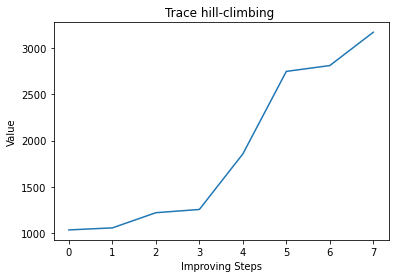

In [18]:
import matplotlib
import matplotlib.pyplot as plt

value, weight, sol, t = hill_climbing_trace(100) 

# print(t) # Trace values sorted in ascending way
plt.plot(t);
plt.title('Trace hill-climbing ')
plt.ylabel('Value')
plt.xlabel('Improving Steps')
plt.show()

In [24]:
import time

start = time.time()
value, weight, sol, t = hill_climbing_trace(100)
end = time.time()

print("Hill Climbing")
print("Profit : {}".format(value))
print("Capacity    : {}".format(cap))
print("Constraints : {}".format(weight))
print("Solution : {}".format(sol))
print(f"Running time in seconds: {(end - start):.2f}")

# n_iter = 50
# n_arr = []

# for i in range(n_iter):
#     value, weight, sol, t = hill_climbing_trace(100)
#     n_arr.append(value)

# n_arr.sort()
# print(n_arr)

Hill Climbing
Profit : 2246
Capacity    : [ 480  760  800 1180  940]
Constraints : [479, 466, 731, 716, 850]
Solution : [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1]
Running time in seconds: 0.01


Sometimes, when run, the algorithm encounters as its first value a local maxima which is a common issue found in hill-climbing algorithm. This problem could be partially solved by using some type of rerstart.

# Part 2 - Algorithm of your choice 

A genetic algorithm is a method used for solving constrained optimization problems based on a natural selection process that simulates biological evolution. <br>The algorithm repeatedly modifies an initially randomly generated population of individual solutions, shaped by a set of operators (mutation, crossover, selection).

The Multi-Knapsack problem is a problem in combinatorial optimization which implies that finding an exact solution given a vast space state to investigate might be rather problematic. This issue is addressed by the use of heuristics methods, which usually provide a good approximation of the optimal solution in a fraction of the time. <br> Hence, evolutionary algorithms, such as genetic algorithms or even ant-colony optimization represent a perfect tool to tackle such problem and generate optimal solutions in a reasonable amount of time, given their roboustness and their ability to provide satisfactory optimisation over large space state, compared to other methods.


## Create an Initial Population

- Create a data structure for the population
- A population is a list of individuals
- An individial is an array with as first component contains a solution vector and its second component a fitness value
- By sorting the population based on fitness in ascending order the placement at index 0 of the array of lower fitness individuals will happen automatically

In [25]:
# Create individuals

def create_individual():
    "Creates an individual as a list of two elements: solution and its fitness"
    sol = random_sol(n, [60,40]) # 60% 0s, and 40% 1s
    fit, w = evaluate(sol)
    return [sol, fit]

In [26]:
# Create population

def create_population(pop_size):
    "Creates an initial population of pop_size randomly generated individuals"
    pop = [] # Create an empty list 
    pop = [create_individual() for i in range(pop_size)]
    pop.sort(key = lambda x: x[1])  #key is set to sort using second element (Fitness) 
    return pop

In [27]:
# Mutation function which receives a solution and based on a generated random integer, changes its index element to its inverse. (if 0 -> 1 & if 1 -> 0) 
# Similar to a bit-flip operator

def mutation(sol):  
    mutant = sol[:] # copy solution
    i = rnd.randint(0,n-1) 
    mutant[i] = 0 if mutant[i] == 1 else 1  # alter position i if 0 assign 1, else assign 1
    return mutant

In [29]:
# Testing the mutation operation
sol =create_population(10)
print("Solution: ", sol[2][0])
mut = mutation(sol[2][0])
print("Mutant:   " , mut)

Solution:  [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
Mutant:    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]


#### Tournament Function
The tournament selection function receives a population as parameter and an integer k, which represents the sample size, indicating consequentaly the number of individuals needed to be sampled.
<br>
Hence, the function will continue looping through the sample removing the every solution based on a tournament taking in consideration the fitness value, until the winner, the last individual left and therfore the one with highest fitness score of each tournament, is selected for crossover. 

Elitism selection could have been added to the algorithm, to retain the best individuals from a previous generation, and carried to the next one unmutated.

In [30]:
# Compares fitenss of k individuals in the population and returns the best of them
import random as rnd

def tournament(pop, k):
    tour_pop = []
    pop_sample = rnd.sample(pop, k) # Extract random sample of size k from parameter population
    for i in range(k):
        tour_pop.append(pop_sample[i]) # Add chosen solution to tournament array 
    while(len(tour_pop) != 1): # Iterate through array based on lenght until only last solution is left and perform tournaments 
        # Remove smaller solution based on value
        if(tour_pop[0][1] > tour_pop[1][1]):
            tour_pop.remove(tour_pop[1])
        else:
            tour_pop.remove(tour_pop[0])
    return tour_pop[0][0] # Return best fitness value solution

In [32]:
# Test the tournament function with a test_population created
test_population = create_population(20)
sample_size = 10
print(tournament(test_population, sample_size))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0]


#### Crossover Functions
Series of different crossover functions (single-point, multi-point, uniform)
This functions receive two solutions as parameters, which are commonly referred as parents and based on the type of crossover perform a series of actions which aim to generate a better fit child as a product, promoting evolution.   

Through experimentations single-point crossover and multi-point crossover seem to produce better suited individuals for the purpose compared to the uniform crossover, which generates individuals through a completely random process. 

In [33]:
# Perform a 1-point crossover between two parents solution, generating an evolved individual
import random as rnd

def single_crossover(p1, p2):  
    length = len(p1)    
    p = rnd.randint(1, length - 1) 
    child = p1[0:p] + p2[p:] # Select parent1 genes from 0 to p + Select parent2 genes from p to end 
    return child

In [34]:
# Perform a random uniform crossover between two parents vectors, generating an evolved individual
import random as rnd

def uniform_crossover(p1, p2): 
    child = []
    for i in range(len(p1)):
        child.append(rnd.randint(0,1))
    return child

In [35]:
# Perform a multi-point crossover between two parents vectors, generating an evolved individual
import random

def multi_crossover(p1, p2): 
    child = [] # Initiate empty array which will store the final result
    length = len(p1)
    # Initiate crossover points
    cp1 = 0
    cp2 = 0
    while(cp1 == cp2): # Check for validity of random generated values (cannot be equal, otherwise index error arises)
        cp1 = random.randint(0, length) # Random crossover point #1
        cp2 = random.randint(0, length) # Random crossover point #2
    if cp1 > cp2:
            # Select parent1 genes from index 0 to crossover point 2
            child.append(p1[0:cp2] + p2[cp2:cp1] + p1[cp1:]) 
    if cp2 > cp1:
            child.append(p1[0:cp1] + p2[cp1:cp2] + p1[cp2:])
    return child

In [41]:
# Testing the various crossover functions

test_pop = create_population(10)
parent1 = test_pop[1][0]
parent2 = test_pop[3][0]
print("Parent - 1:        ", parent1)
print("Parent - 2:        ", parent2)
print("Single-Crossover:  ",single_crossover(parent1, parent2))
print("Multi-Crossover:   ",(multi_crossover(parent1, parent2))[0])
print("Uniform-Crossover: ",uniform_crossover(parent1, parent2))

Parent - 1:         [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
Parent - 2:         [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0]
Single-Crossover:   [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]
Multi-Crossover:    [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
Uniform-Crossover:  [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]


# Genetic Algorithm :

- maxiter     : Integer value which indicates how many times the algorithm has to iterate.
- pop_size    : Integer value which consists of the population size to be created.
- crossover   : String value which allows the selection of crossover operator between "single_crossover", "multi_crossover", "uniform_crossover" 
- sample_size : Integer value which allows the selection of desired sample size utilized in the tournament selection function.  



The algorithm starts by initiating a population of individuals of size pop_size.
<br>
A trace array is also initialized, which will keep track of all the improvements gained throughout the various processes of the algorithm.
<br>
The body of the algorithm consists of a loop which executes various functions, which are aimed at the final goal of finding an optimal generation of individual. <br>Such functions are a tournament selection, which is followed by a crossover receiving two parent solutions as paramteres and generates an offspring solution, which will be than passed as a parameter to a mutation function. Once all these actions have been performed the resulting solution will be evaluated and finally checked to identify its validity.



In [42]:
# Gentetic Algorithm
import numpy as np

def genetic_algorithm(maxiter, pop_size, crossover, sample_size):
    trace = [] # to keep the trace of the improvements during the GA iterations 
    pop = create_population(pop_size)
    #trace.append(pop[pop_size - 1][1]) # Add the best value (fitness) in the population
    for i in range(maxiter):
        # Perform tournament on 2 parents which will be passed as parameters for the crossover
        parent1 = tournament(pop, sample_size)
        parent2 = tournament(pop, sample_size)
        # Choice of crossover operator based on user
        if(crossover == "single_crossover"):
            child = single_crossover(parent1, parent2) # Perform crossover
        elif(crossover == "multi_crossover"):
            child = multi_crossover(parent1, parent2)[0] # Perform crossover
        elif(crossover == "uniform_crossover"):
            child = uniform_crossover(parent1, parent2) # Perform crossover
        child = mutation(child) # Perform mutation 
        if(solutionChecker(child)): # Check validity of solution
            value, weight = evaluate(child) # Evaluate child solution only once validity was established
            trace.append(value)
            pop[0][0] = child # Add the mutated solution to population
            pop[0][1] = value # Add the best value (fitness) in the population
            pop.sort(key = lambda x: x[1]) # Sort population array based on values found in index 1 (fitness values)
    trace.sort() 
    return pop[-1], trace # return last element in pop (best one) and trace array


Best Solution Found: 5534


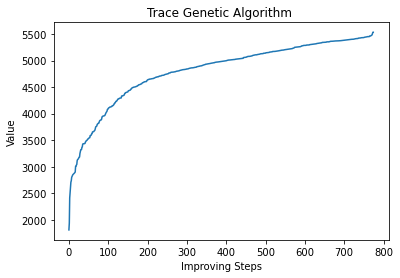

In [43]:
# Genetic Algorithm Testing and plot representation 
import matplotlib
import matplotlib.pyplot as plt

num_iter = 1400 # Number of times the algorithm will run for
pop_size = 250 # Define the population size

best_found, tr = genetic_algorithm(num_iter, pop_size, "multi_crossover", 12)
print("Best Solution Found:", best_found[1])
# print(tr) # Trace array printer

plt.plot(tr);
plt.title('Trace Genetic Algorithm ')
plt.ylabel('Value')
plt.xlabel('Improving Steps')
plt.show()

In [50]:
# Time performance analysis of Genetic Algorithm for leaderboard

import time

start = time.time()
best_found, tr = genetic_algorithm(1400, 250, "multi_crossover", 12)
end = time.time()

weightArray = []

for i in range(len(cap)):
    weight = sum([best_found[0][j] * res[i][j] for j in range(n)])
    weightArray.append(weight)

print("Genetic Algorithm")
print("Profit      : {}".format(best_found[1]))
print("Capacity    : {}".format(cap))
print("Constraints : {}".format(weightArray))
print("Solution    : {}".format(best_found[0]))
print(f"Running time in seconds: {(end - start):.2f}")

# Optimal parameters found thorugh experimentation: 
# - pop_size = 250
# - n_iterations = 1000
# - tournament_size = 10
# - 0/1 {60,40}

Genetic Algorithm
Profit      : 5496
Capacity    : [ 480  760  800 1180  940]
Constraints : [476, 557, 768, 843, 937]
Solution    : [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
Running time in seconds: 0.34


# Part 3: Performance Comparison


### Report plots and numeric comparison values:

### File Name : "multi_knap_n28_m2.txt"

##### Operator choices: 
- Population Size: By manipulating the population size, we are able increase computation time due to the size of the set the algorithm has to deal with, but it also increases the chances of founding an optimal solution. <br>
Version 1 : Population Size = 120 <br>
Version 2 : Population Size = 250
- Crossover Type: By manipulating the crossover type we are able to generate different looking solutions, given the diverse method each crossover function uses to fabricate an offspring solution. <br>
Version 1 : Crossover Type = Single Crossover <br>
Version 2 : Crossover Type = Uniform Crossover
- Tournament Selection Size: By manipulating the tournament size we are able to simply determine how many individuals will be selected to be part of each tournament, a good rule of thumb though is to include roughly 20% of your population in each generation, which for semplicity can be translated in finding the nearset power of 2. 
Version 1 : Tournament Size = 7 (since 2^7 = 126) <br>
Version 2 : Tournament Size = 8 (since 2^8 = 256) 

The comparison was made fair by keeping the number of iteration exactly the same throughout the experiments, since it is one the most impactful parameters in terms of time complexity. The population size values are fairly handled by selecting a proportionally and suitable tournament size value, which will inevitably balance the discrepancies betweene the algoritmhs with regard to computational effort. 

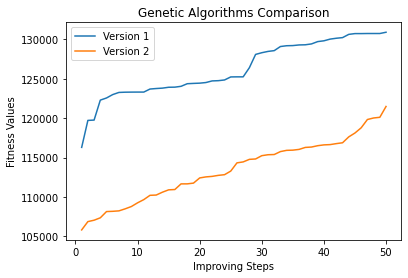

Algorithm Version1
Avarage/Mean:       126217.2
Standard Deviation: 3483.263


Algorithm Version2
Avarage/Mean:       113447.86
Standard Deviation: 3905.5862


In [239]:
from matplotlib import pyplot as plt
import numpy as np

data_file_name = "multi_knap_n28_m2.txt"        
n, m, profits, res, cap = read_multi_knapsack(data_file_name)

n_iter = 50
version_1 = []
version_2 = []
steps = []

for i in range(n_iter):
    solution_v1, tr_v1 = genetic_algorithm(1000, 120, "single_crossover", 7) # Run GA for version 1
    solution_v2, tr_v2 = genetic_algorithm(1000, 250, "uniform_crossover", 8) # Run GA for version 2
    # Append solutions found through the iterations to the respective arrays
    version_1.append(solution_v1[1])
    version_2.append(solution_v2[1])
    # Create array which represents the x-axis in the plot and append the # of iterations
    steps.append(i + 1) 
version_1.sort()
version_2.sort()
# print(version_1)
# print(version_2)
# print(iteration_array)

plt.plot(steps, version_1, label='Version 1')
plt.plot(steps, version_2, label='Version 2')
plt.title('Genetic Algorithms Comparison')
plt.ylabel('Fitness Values')
plt.xlabel('Improving Steps')
plt.legend()
plt.show()

# Version 1
print("Algorithm Version1")
print("Avarage/Mean:      ", np.mean(version_1, dtype = np.float32))
print("Standard Deviation:", np.std(version_1, dtype = np.float32))
print("\n")
# Version 2
print("Algorithm Version2")
print("Avarage/Mean:      ", np.mean(version_2, dtype = np.float32))
print("Standard Deviation:", np.std(version_2, dtype = np.float32))

### Report plots and numeric comparison values:

### File Name : "multi_knap_n40_m5.txt"

##### Operator choices: 
- Population Size: By manipulating the population size, we are able increase computation time due to the size of the set the algorithm has to deal with, but it also increases the chances of founding an optimal solution. <br>
Version 1 : Population Size = 250 <br>
Version 2 : Population Size = 512
- Crossover Type: By manipulating the crossover type we are able to generate different looking solutions, given the diverse method each crossover function uses to fabricate an offspring solution. <br>
Version 1 : Crossover Type = Mutliple Crossover <br>
Version 2 : Crossover Type = Single Crossover
- Tournament Selection Size: By manipulating the tournament size we are able to simply determine how many individuals will be selected to be part of each tournament, a good rule of thumb though is to include roughly 20% of your population in each generation, which for semplicity can be translated in finding the nearset power of 2. 
Version 1 : Tournament Size = 7 (since 2^7 = 256) <br>
Version 2 : Tournament Size = 9 (since 2^9 = 512) 

The comparison was made fair by keeping the number of iteration exactly the same throughout the experiments, since it is one the most impactful parameters in terms of time complexity. The population size values are fairly handled by selecting a proportionally and suitable tournament size value, which will inevitably balance the discrepancies betweene the algoritmhs with regard to computational effort. 
<br> 
The operator that provoked such a drastic change in the first experiment was the crossover function. The uniform crossover does not suit the purpose since it considerably decreases the efficency of the algorithm. Therefore by changing the crossover type from uniform to single-point we can see an improvement in performance, however still unmatching the multi-point crossover. 

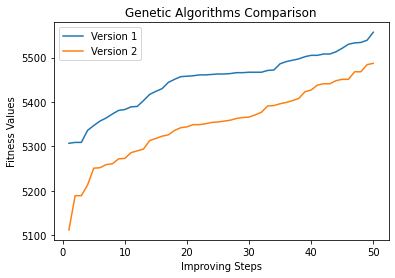

Algorithm Version1
Avarage/Mean:       5449.22
Standard Deviation: 63.48048


Algorithm Version2
Avarage/Mean:       5351.5
Standard Deviation: 81.95859


In [240]:
from matplotlib import pyplot as plt
import numpy as np

data_file_name = "multi_knap_n40_m5.txt"        
n, m, profits, res, cap = read_multi_knapsack(data_file_name)

n_iter = 50
version_1 = []
version_2 = []
steps = []

for i in range(n_iter):
    solution_v1, tr_v1 = genetic_algorithm(1400, 250, "multi_crossover", 7) # Run GA for version 1
    solution_v2, tr_v2 = genetic_algorithm(1400, 512, "single_crossover", 9) # Run GA for version 2
    # Append solutions found through the iterations to the respective arrays
    version_1.append(solution_v1[1])
    version_2.append(solution_v2[1])
    # Create array which represents the x-axis in the plot and append the # of iterations
    steps.append(i + 1) 
version_1.sort()
version_2.sort()
# print(version_1)
# print(version_2)
# print(iteration_array)

plt.plot(steps, version_1, label='Version 1')
plt.plot(steps, version_2, label='Version 2')
plt.title('Genetic Algorithms Comparison')
plt.ylabel('Fitness Values')
plt.xlabel('Improving Steps')
plt.legend()
plt.show()

# Version 1
print("Algorithm Version1")
print("Avarage/Mean:      ", np.mean(version_1, dtype = np.float32))
print("Standard Deviation:", np.std(version_1, dtype = np.float32))
print
print("\n")
# Version 2
print("Algorithm Version2")
print("Avarage/Mean:      ", np.mean(version_2, dtype = np.float32))
print("Standard Deviation:", np.std(version_2, dtype = np.float32))